# Anime Linear Regression

### Probleem
In deze dataset zitten 16.000 animes, met al hun attributes, zoals: titel, genre, rank, popularity, score etc.

Wat ik wil doen met deze dataset, is om doormiddel van Linear Regression te voorspellen of wat voor een score een anime zou krijgen, gebasseerd op bepaalde features.

Dit ga ik doen door eerst de data the analyseren, om te kijken welke features belangrijk zijn om mee te nemen in het model.

Daarna schoon ik de data op, zodat het model er fatsoenlijk op kan leren.

Na dat het model getraint is, test ik het model om te kijken hoe het presteert. Daarna is er de mogelijkheid om het model nog te verbeteren.

### Voorspelling
Ik voorspel dat de score van een anime zeer afhankelijk is van de populairiteit en rang. Deze 2 features gaan denk ik het belangrijkste zijn. Misschien kan genre ook invloed hebben, maar ik denk het niet.


# Visualizing the Data

In [2]:
# importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import ast

In [3]:
# reading the data
data = pd.read_csv('animes.csv')

# checking the first 5 rows of the data
data.head()

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,https://cdn.myanimelist.net/images/anime/6/867...,https://myanimelist.net/anime/34599/Made_in_Abyss
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,https://cdn.myanimelist.net/images/anime/1223/...,https://myanimelist.net/anime/5114/Fullmetal_A...
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83,https://cdn.myanimelist.net/images/anime/3/815...,https://myanimelist.net/anime/31758/Kizumonoga...


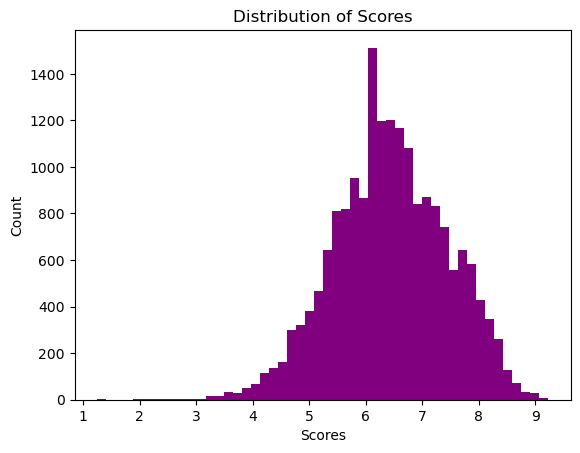

In [4]:
# Visualizing the data

# Plotting the distribution of the scores
scores = data['score']
plt.hist(scores, bins=50, color='purple')
plt.title('Distribution of Scores')
plt.xlabel('Scores')
plt.ylabel('Count')
plt.show()

##### Belang van bepaalde features
Ik wil de features extracten zodat ik kan zien welke genre meer invloed heeft op een hogere score.

In [5]:
# Convert the genre column to a list
data['genre'] = data['genre'].apply(ast.literal_eval)

# Extracting genres
all_genres = set()
for genre in data['genre']:
    all_genres.update(genre)

print(all_genres)

{'Shoujo', 'Comedy', 'Demons', 'Sci-Fi', 'Seinen', 'Martial Arts', 'Psychological', 'Game', 'Space', 'Fantasy', 'Music', 'Yaoi', 'Yuri', 'Shounen Ai', 'Military', 'Supernatural', 'Slice of Life', 'Police', 'Thriller', 'Samurai', 'Mecha', 'Parody', 'Romance', 'Action', 'Dementia', 'Shoujo Ai', 'School', 'Sports', 'Horror', 'Josei', 'Mystery', 'Drama', 'Magic', 'Hentai', 'Historical', 'Cars', 'Ecchi', 'Super Power', 'Adventure', 'Shounen', 'Kids', 'Harem', 'Vampire'}


In [6]:
# Creating a column for each genre
for genre in all_genres:
    data[genre] = 0 # initialize all values to 0

# Itterating through the rows and setting the genre to 1 if it is present
for index, row in data.iterrows():
    for genre in row['genre']:
        if genre in all_genres:
            data.at[index, genre] = 1

# Dropping the genre column
data = data.drop('genre', axis=1)

data.head()

,uid,title,synopsis,aired,episodes,members,popularity,ranked,score,img_url,...,Hentai,Historical,Cars,Ecchi,Super Power,Adventure,Shounen,Kids,Harem,Vampire
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,...,0,0,0,0,0,0,1,0,0,0
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,...,0,0,0,0,0,0,1,0,0,0
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,https://cdn.myanimelist.net/images/anime/6/867...,...,0,0,0,0,0,1,0,0,0,0
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,https://cdn.myanimelist.net/images/anime/1223/...,...,0,0,0,0,0,1,1,0,0,0
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"Jan 6, 2017",1.0,214621,502,22.0,8.83,https://cdn.myanimelist.net/images/anime/3/815...,...,0,0,0,0,0,0,0,0,0,1


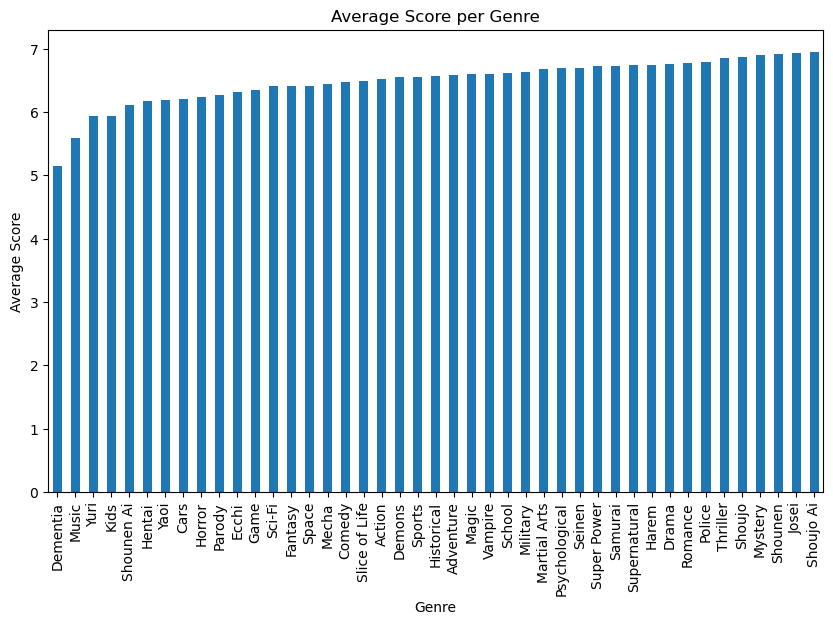

In [7]:

# Calculate the average score for each genre
average_scores = {}
for genre in all_genres:

    # Calculate the average score for the genre
    total_score = (data[genre] * data['score']).sum()

    # Calculate the total number of scores for the genre
    total_count = data[genre].sum()

    # Calculate the average score
    average_scores[genre] = total_score / total_count

# Convert the dictionary to a Series for easier plotting
average_scores = pd.Series(average_scores)

# Plot the average scores
average_scores.sort_values().plot(kind='bar', figsize=(10, 6))
plt.xlabel('Genre')
plt.ylabel('Average Score')
plt.title('Average Score per Genre')
plt.show()

Nu dat alle genres een apparte kollom hebben, kunnen we nu ook kijken naar de gemiddelde score van een genre. Hierboven kun je zien dat de gemiddelde score eigenlijk niks gezegt. 

# Cleaning the data

In [8]:
# Printing the missing values
print(data.isnull().sum())

uid                 0
title               0
synopsis          975
aired               0
episodes          706
members             0
popularity          0
ranked           3212
score             579
img_url           180
link                0
Shoujo              0
Comedy              0
Demons              0
Sci-Fi              0
Seinen              0
Martial Arts        0
Psychological       0
Game                0
Space               0
Fantasy             0
Music               0
Yaoi                0
Yuri                0
Shounen Ai          0
Military            0
Supernatural        0
Slice of Life       0
Police              0
Thriller            0
Samurai             0
Mecha               0
Parody              0
Romance             0
Action              0
Dementia            0
Shoujo Ai           0
School              0
Sports              0
Horror              0
Josei               0
Mystery             0
Drama               0
Magic               0
Hentai              0
Historical

Hier zien we dat we best wat waarden missen in sommige kolommen. Maar we gaan niet alle kolommen gebruiken voor ons model. 

We verwijderen de kolom `synopsis`, omdat we linear regessie gaan gebruiken als model om te voorspellen. Dus deze kolom hebben we niet nodig

De `episodes` kolom mist ook wat data, deze data vullen we met de mean.

De animes zonder `ranked` kunnen we helaas niks mee. deze waarde kunnen we niet vullen met iets aangezien dat onze ranglijst verpest. Deze moeten we verwijderen.

In de `score` kollom vullen we ook de missende waarden met de mean.

We verwijderen de `img_url` kolom, omdat die geen waarde toevoegd aan ons model.



In [9]:
data.head()

,uid,title,synopsis,aired,episodes,members,popularity,ranked,score,img_url,...,Hentai,Historical,Cars,Ecchi,Super Power,Adventure,Shounen,Kids,Harem,Vampire
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,...,0,0,0,0,0,0,1,0,0,0
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,...,0,0,0,0,0,0,1,0,0,0
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,https://cdn.myanimelist.net/images/anime/6/867...,...,0,0,0,0,0,1,0,0,0,0
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,https://cdn.myanimelist.net/images/anime/1223/...,...,0,0,0,0,0,1,1,0,0,0
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"Jan 6, 2017",1.0,214621,502,22.0,8.83,https://cdn.myanimelist.net/images/anime/3/815...,...,0,0,0,0,0,0,0,0,0,1


In [10]:
# Cleaning the data
removed_features = ['uid', 'title', 'synopsis', 'img_url', 'link']
for feature in removed_features:
    data = data.drop(feature, axis=1)

# Delete rows with missing ranks
data['ranked'] = data['ranked'].dropna()

# Fill missing values with the mean
data['score'] = data['score'].fillna(data['score'].mean())
data['episodes'] = data['episodes'].fillna(data['episodes'].mean())

data.head()

,aired,episodes,members,popularity,ranked,score,Shoujo,Comedy,Demons,Sci-Fi,...,Hentai,Historical,Cars,Ecchi,Super Power,Adventure,Shounen,Kids,Harem,Vampire
0,"Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,"Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,"Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,"Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
4,"Jan 6, 2017",1.0,214621,502,22.0,8.83,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [11]:
# Extract the start date from the 'aired' column
data['start_date'] = data['aired'].apply(lambda x: x.split(' to ')[0])

# Convert the start date to datetime format
data['start_date'] = pd.to_datetime(data['start_date'], errors='coerce')

# Extract the month from the start date
data['start_month'] = data['start_date'].dt.month

# Drop aired collumn
data = data.drop(['aired', 'start_date'], axis=1)

data.head()

,episodes,members,popularity,ranked,score,Shoujo,Comedy,Demons,Sci-Fi,Seinen,...,Historical,Cars,Ecchi,Super Power,Adventure,Shounen,Kids,Harem,Vampire,start_month
0,25.0,489888,141,25.0,8.82,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,10.0
1,22.0,995473,28,24.0,8.83,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,10.0
2,13.0,581663,98,23.0,8.83,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,7.0
3,64.0,1615084,4,1.0,9.23,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,4.0
4,1.0,214621,502,22.0,8.83,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1.0


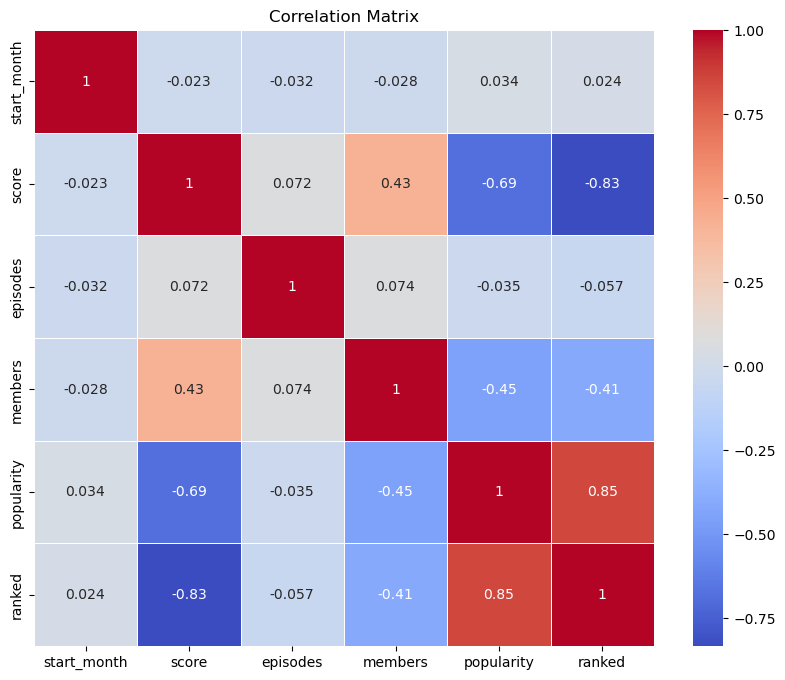

In [12]:
# Correlation matrix
correlation_matrix = data[['start_month', 'score', 'episodes', 'members', 'popularity', 'ranked']].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Nu dat ik de data opgeschoont heb, en alle belangijke features heb, heb ik nu een correlatie matrix gemaakt tussen alle features, behalve de genres.

Hieruit kun je een paar dingen zien:

- De datum wanneer een anime start, heeft geen invloed op de score/
populairiteit/rank.

- Hoe meer members een anime heeft, hoe hoger de score is, en vice versa.

- De populariteit heeft een zeer hoge positieve correlatie met rank. Dus hoe populairder een anime is, hoe hoger de rank.

- Maar, populariteit heeft een negatieve correlatie met de score. Dit betekend hoe populairder een anime wordt, dat de score omlaag gaat. Dit kan omdat er dan spraken is 'Over hype', dit betekend dat de verwachting te groot was van de kijkers.

- Ook heef de rang een hele grote negatieve correlatie met de score. Dit is logisch, want hoe hoger de rang(eigenlijk dus slechter), hoe lager de score. Dus rang 500 heeft een lagere score dan rang 1, wat logisch is.

# Training and testing the model

Mean Absolute Error: 0.29908409468777436
Mean Squared Error: 0.2286531958265429
Root Mean Squared Error: 0.4781769503296273


Text(0, 0.5, 'Predictions')

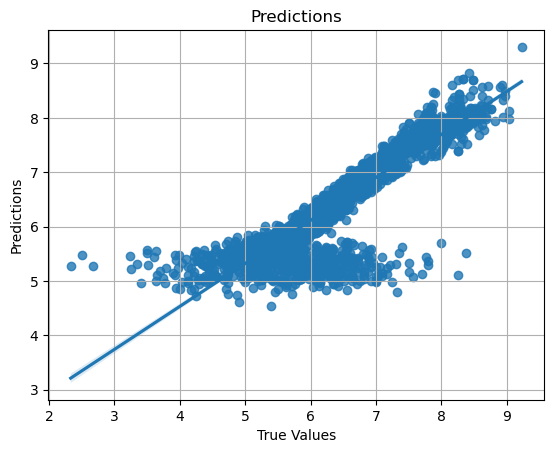

In [13]:
# Splitting the data
data = data.dropna()
X = data.drop(['score'], axis=1)
y = data['score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Creating the model
lr = LinearRegression()

# Training the model
lr.fit(X_train, y_train)

# Making predictions
y_pred = lr.predict(X_test)

# Evaluating the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Plotting the predictions
sns.regplot(x=y_test, y=y_pred, data=data)
plt.grid(True)
plt.title('Predictions')
plt.xlabel('True Values')
plt.ylabel('Predictions')



Hier kan je de voorspellingen zien van het model. Wat opvalt is dat het model niet onder 5 voorspelt. Wat raar is, want sommige animes hebben wel een true value lager dan 5.

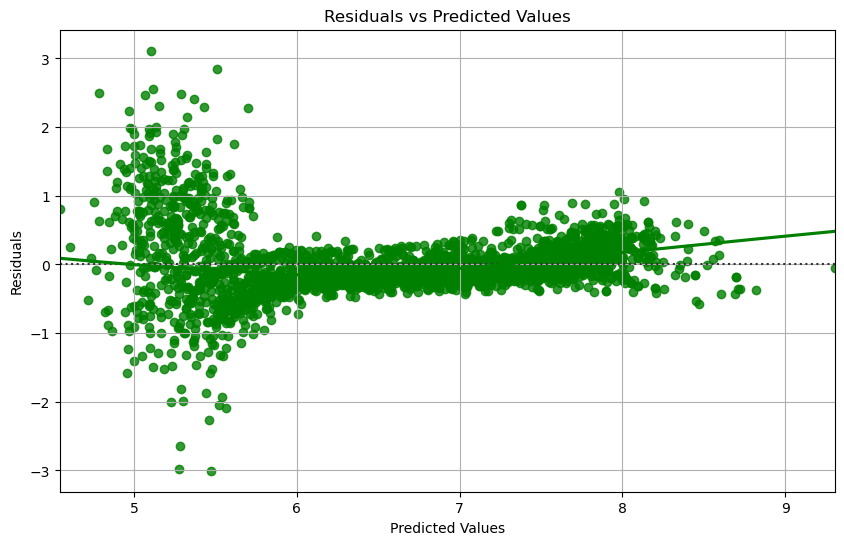

In [14]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10,6))
sns.residplot(x=y_pred, y=residuals, lowess=True, color='g')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


Door de het verschil tussen de voorspelling en test data te berekenen, kan je kijken of een model een bias heeft. Als een model unbiased is, dan is het rond de 0. Maar je kan duidelijk zien dat rond 5-6 het model niet rond de 0 zit. Hier is een duidelijk patroon, dit betekend dat het model een bias heeft voor 5.

# Improve

Om het model misschien te verbeteren en de bias de corrigeren, ga ik de data normaliseren.

Mean Absolute Error: 0.2990840946877732
Mean Squared Error: 0.2286531958265417
Root Mean Squared Error: 0.4781769503296261


Text(0, 0.5, 'Predictions')

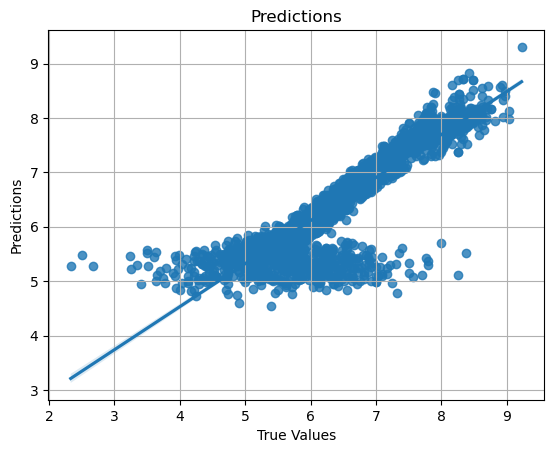

In [23]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the model
lr = LinearRegression()

# Train the model
lr.fit(X_train_scaled, y_train)

# Make predictions
y_pred = lr.predict(X_test_scaled)

# Evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Plotting the predictions
sns.regplot(x=y_test, y=y_pred, data=data)
plt.grid(True)
plt.title('Predictions')
plt.xlabel('True Values')
plt.ylabel('Predictions')



# Evaluate

Zelfs na dat het model genormaliseerd of gestandaardiseerd is, presteert het precies hetzelfde. Het heeft de zelfde Root Mean Squared Error.

Het model presteert best goed, maar hij heeft een zware bias voor de score 5. Misschien ligt dit aan hoe ik mijn data heb voorbereid, maar het is mij niet gelukt om deze bias eruit te halen. Zelf heb ik daar ook nog niet genoeg kennis over.

Ook is het voorspellen van een score op een anime heel erg 'vaag', ten eerste is het subjectief, en voor een AI model die de anime niet eens gezien heeft om dan vervolgens een voorspelling te maken, is best krom. 

Maar zoals verwacht, in de correlatie matrix kan je zien dat er een duidelijke correlatie is tussen populariteit en rang met de score. Dit heeft dus een grote impact op de voorspellingen van dit model.